In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.data',
names=['sepal_length','sepal_width','petal_length','petal_width','target'])
display(df.head())

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.target.value_counts()

Iris-setosa        53
Iris-versicolor    52
Iris-virginica     51
Name: target, dtype: int64

In [4]:
print(df.isna().sum())

sepal_length    2
sepal_width     0
petal_length    2
petal_width     3
target          3
dtype: int64


In [5]:
df.dropna(axis=0, inplace=True)
display(df.head())
print(df.isna().sum())

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64


In [6]:
le = LabelEncoder()
df.target = le.fit_transform(df.target)
display(df)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
153,6.7,3.0,5.2,2.3,2
154,6.3,2.5,5.0,1.9,2
155,6.5,3.0,5.2,2.0,2
157,6.2,3.4,5.4,2.3,2


# ایراد این روش این است که داده های کیفی ما را به متغیر های کمیتی تبدیل کرده است و تفاوت و مقایسه کمی بین برچسب های مختلف قائل است. 


# OneHotEncoder:
# در این روش برای هر برچسب یک ستون باینری در نظر گرفته میشود و اگر داده ای برچسب خاصی را داشت، برای آن داده در ستون متناظر با آن برچسب 1 لحاظ میشود و در غیر این صورت صفر.
# برای درک بهتر و مثال، این روش را روی داده هایی که در اختیار داریم پیاده سازی میکنیم:


In [7]:
enc = OneHotEncoder()
target_array = df.target.values
encoded_targets = enc.fit_transform(target_array.reshape(-1,1))
encoded_data = pd.DataFrame(np.column_stack([
    df.iloc[:, :-1], encoded_targets.toarray()]))
encoded_data.columns = list(df.columns[:-1]) + ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
display(encoded_data)

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


In [10]:
scaler = StandardScaler()
print('before normalization, mean for each feature is:\n', df.mean(), '\nand std is\n', df.std())
scaled_data = scaler.fit_transform(df.iloc[:, :-1])
nomralized_data = pd.DataFrame(np.column_stack([
    scaled_data, encoded_targets.toarray()]))
display(nomralized_data)
print('before normalization, mean for each feature is:\n', nomralized_data.mean(), '\nand std is\n', nomralized_data.std())


before normalization, mean for each feature is:
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
target          1.000000
dtype: float64 
and std is
 sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
target          0.819232
dtype: float64


,0,1,2,3,4,5,6
0,-0.900681,1.032057,-1.341272,-1.312977,1.0,0.0,0.0
1,-1.143017,-0.124958,-1.341272,-1.312977,1.0,0.0,0.0
2,-1.385353,0.337848,-1.398138,-1.312977,1.0,0.0,0.0
3,-1.506521,0.106445,-1.284407,-1.312977,1.0,0.0,0.0
4,-1.021849,1.263460,-1.341272,-1.312977,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,0.0,0.0,1.0
146,0.553333,-1.281972,0.705893,0.922064,0.0,0.0,1.0
147,0.795669,-0.124958,0.819624,1.053537,0.0,0.0,1.0
148,0.432165,0.800654,0.933356,1.447956,0.0,0.0,1.0


before normalization, mean for each feature is:
 0   -2.775558e-16
1   -5.140333e-16
2    1.154632e-16
3    9.251859e-16
4    3.333333e-01
5    3.333333e-01
6    3.333333e-01
dtype: float64 
and std is
 0    1.003350
1    1.003350
2    1.003350
3    1.003350
4    0.472984
5    0.472984
6    0.472984
dtype: float64


In [37]:
pca = PCA(n_components=2)
transformed_X = pca.fit_transform(nomralized_data.iloc[:,:4])
transformed_data = pd.DataFrame(np.column_stack([
    transformed_X, encoded_targets.toarray()]))
display(transformed_data)

,0,1,2,3,4
0,-2.264542,0.505704,1.0,0.0,0.0
1,-2.086426,-0.655405,1.0,0.0,0.0
2,-2.367950,-0.318477,1.0,0.0,0.0
3,-2.304197,-0.575368,1.0,0.0,0.0
4,-2.388777,0.674767,1.0,0.0,0.0
...,...,...,...,...,...
145,1.870522,0.382822,0.0,0.0,1.0
146,1.558492,-0.905314,0.0,0.0,1.0
147,1.520845,0.266795,0.0,0.0,1.0
148,1.376391,1.016362,0.0,0.0,1.0


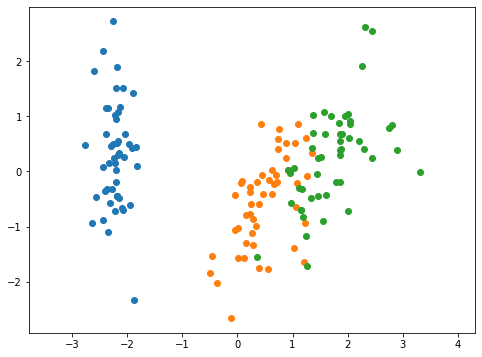

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(transformed_data[transformed_data[2] == 1][0],transformed_data[transformed_data[2] == 1][1])
plt.scatter(transformed_data[transformed_data[3] == 1][0],transformed_data[transformed_data[3] == 1][1])
plt.scatter(transformed_data[transformed_data[4] == 1][0],transformed_data[transformed_data[4] == 1][1])
plt.axis('equal')
plt.show()

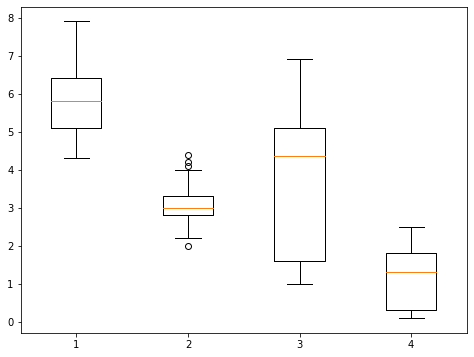

In [41]:
plt.figure(figsize=(8, 6))
plt.boxplot(df.iloc[:,:-1])
plt.show()